Question 1 

When multiplying two matrices one with shape (n, k) and the other with shape (k, m) the result is an (n, m) matrix. Each entry in the result is obtained by taking a row from the first matrix and a column from the second matrix, multiplying their corresponding elements (requiring k multiplications), and then summing these products (requiring k - 1 additions). Since there are n * m entries in the result, the total number of multiplications is n * m * k and the total number of additions is n * m * (k - 1). For example, if n = 2, k = 3, and m = 4, there would be 2 * 4 * 3 = 24 multiplications and 2 * 4 * (3 - 1) = 16 additions in total.


Question 2 

In [54]:
import random
import time

# Create random matrices using lists of lists
def generate_matrix(rows, cols):
    """Generate a matrix with random integers between 1 and 10."""
    return [[random.randint(1, 10) for _ in range(cols)] for _ in range(rows)]

# Multiply two matrices manually
def multiply_matrices_list(A, B):
    n = len(A)        # rows in A
    k = len(A[0])     # cols in A
    m = len(B[0])     # cols in B

    # Create result matrix C filled with zeros
    C = [[0 for _ in range(m)] for _ in range(n)]

    # Triple nested loop
    for i in range(n):         # rows of A
        for j in range(m):     # cols of B
            for t in range(k): # inner dimension
                C[i][j] += A[i][t] * B[t][j]
    return C

# Test for small size
A = generate_matrix(3, 2)
B = generate_matrix(2, 4)

print("Matrix A:", A)
print("Matrix B:", B)
print("Product (list of lists):", multiply_matrices_list(A, B))

import numpy as np

# Generate random matrices in NumPy
A_np = np.random.randint(1, 11, (3, 2))  # integers 1–10
B_np = np.random.randint(1, 11, (2, 4))

# Multiply using NumPy's dot product
C_np = np.dot(A_np, B_np)

print("Matrix A:\n", A_np)
print("Matrix B:\n", B_np)
print("Product (NumPy):\n", C_np)

# Larger size for timing
n, k, m = 200, 300, 150

# Generate matrices
A_list = generate_matrix(n, k)
B_list = generate_matrix(k, m)

A_np = np.array(A_list)
B_np = np.array(B_list)

# Time list-based multiplication
start_list = time.time()
C_list = multiply_matrices_list(A_list, B_list)
end_list = time.time()

# Time NumPy multiplication
start_np = time.time()
C_numpy = np.dot(A_np, B_np)
end_np = time.time()

print(f"List-based method time: {end_list - start_list:.6f} seconds")
print(f"NumPy method time: {end_np - start_np:.6f} seconds")

print("NumPy is much faster because: It is written in optimized C code under the hood (not pure Python), it uses vectorization to operate on whole chunks of data at once, and avoids Python loop overhead, whereas list-based multiplication is slow because Python loops are interpreted one step at a time.")


Matrix A: [[3, 4], [10, 6], [2, 8]]
Matrix B: [[5, 6, 5, 4], [1, 6, 6, 4]]
Product (list of lists): [[19, 42, 39, 28], [56, 96, 86, 64], [18, 60, 58, 40]]
Matrix A:
 [[8 1]
 [9 4]
 [6 4]]
Matrix B:
 [[ 1  7 10 10]
 [ 5  6  2  3]]
Product (NumPy):
 [[ 13  62  82  83]
 [ 29  87  98 102]
 [ 26  66  68  72]]
List-based method time: 0.340256 seconds
NumPy method time: 0.002869 seconds
NumPy is much faster because: It is written in optimized C code under the hood (not pure Python), it uses vectorization to operate on whole chunks of data at once, and avoids Python loop overhead, whereas list-based multiplication is slow because Python loops are interpreted one step at a time.


Question 3 

In [31]:
import random
import time
import numpy as np

# Generate a random list of integers
def generate_list(size):
    return [random.randint(1, 1000000) for _ in range(size)]

# Method 1: Repeated passes (O(n²))
def median_repeated_passes(lst):
    arr = lst.copy()
    n = len(arr)
    target_index = n // 2

    for _ in range(target_index):
        max_val = max(arr)
        arr.remove(max_val)

    return max(arr) if n % 2 == 1 else sum(sorted(arr)[target_index-1:target_index+1]) / 2

# Method 2: Sort once and pick median (O(n log n))
def median_sort(lst):
    arr = sorted(lst)
    n = len(arr)
    mid = n // 2
    if n % 2 == 1:
        return arr[mid]
    else:
        return (arr[mid - 1] + arr[mid]) / 2

# Compare runtimes
size = 10000  # adjust for speed
data = generate_list(size)

start = time.time()
med1 = median_repeated_passes(data)
time1 = time.time() - start

start = time.time()
med2 = median_sort(data)
time2 = time.time() - start

start = time.time()
med3 = np.median(data)
time3 = time.time() - start

print(f"Median (Repeated Passes): {med1} | Time: {time1:.5f} sec")
print(f"Median (Sort Once): {med2} | Time: {time2:.5f} sec")
print(f"Median (NumPy): {med3} | Time: {time3:.5f} sec")


Median (Repeated Passes): 256566.0 | Time: 0.23135 sec
Median (Sort Once): 513192.5 | Time: 0.00065 sec
Median (NumPy): 513192.5 | Time: 0.00031 sec


Question 4


The given function is $f(x, y) = x^2y + y^3\sin(x)$, and we want its gradient, i.e., the vector of partial derivatives with respect to $x$ and $y$. For $\frac{\partial f}{\partial x}$, the derivative of $x^2y$ with respect to $x$ is $2xy$ (treating $y$ as constant), and the derivative of $y^3\sin(x)$ with respect to $x$ is $y^3\cos(x)$, giving $\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)$. For $\frac{\partial f}{\partial y}$, the derivative of $x^2y$ with respect to $y$ is $x^2$ (treating $x$ as constant), and the derivative of $y^3\sin(x)$ with respect to $y$ is $3y^2\sin(x)$, leading to $\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)$. Thus, the final gradient vector is $\nabla f(x, y) = \big(2xy + y^3\cos(x), \; x^2 + 3y^2\sin(x)\big)$.


Question 5

In [33]:
import jax
import jax.numpy as jnp
import numpy as np

# Step 1: Define the function
def f(vars):
    x, y = vars
    return x**2 * y + y**3 * jnp.sin(x)

# Step 2: Analytical gradient function
def analytical_grad(x, y):
    df_dx = 2*x*y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3*y**2 * jnp.sin(x)
    return df_dx, df_dy

# Step 3: JAX gradient function
grad_f = jax.grad(f, argnums=(0,))  # gradient wrt first var
grad_f_xy = jax.grad(lambda vars: f(vars))  # wrt both x & y at once

# Step 4: Compare for random values
for _ in range(5):
    # Random values of x and y
    x_val = np.random.uniform(-5, 5)
    y_val = np.random.uniform(-5, 5)
    
    # Analytical
    grad_analytical = analytical_grad(x_val, y_val)
    
    # JAX AutoDiff
    grad_jax = grad_f_xy(jnp.array([x_val, y_val]))
    
    print(f"x = {x_val:.3f}, y = {y_val:.3f}")
    print(f"Analytical gradient: {grad_analytical}")
    print(f"JAX gradient:       {tuple(grad_jax)}")
    print("-" * 40)



x = 2.833, y = -1.962
Analytical gradient: (Array(-3.9232302, dtype=float32, weak_type=True), Array(11.530821, dtype=float32, weak_type=True))
JAX gradient:       (Array(-3.9232297, dtype=float32), Array(11.530821, dtype=float32))
----------------------------------------
x = 0.463, y = -2.614
Analytical gradient: (Array(-18.396807, dtype=float32, weak_type=True), Array(9.360372, dtype=float32, weak_type=True))
JAX gradient:       (Array(-18.396807, dtype=float32), Array(9.360371, dtype=float32))
----------------------------------------
x = -0.710, y = 0.033
Analytical gradient: (Array(-0.04748807, dtype=float32, weak_type=True), Array(0.5014057, dtype=float32, weak_type=True))
JAX gradient:       (Array(-0.04748807, dtype=float32), Array(0.5014057, dtype=float32))
----------------------------------------
x = -0.796, y = -1.962
Analytical gradient: (Array(-2.160116, dtype=float32, weak_type=True), Array(-7.6151752, dtype=float32, weak_type=True))
JAX gradient:       (Array(-2.160116, dt

Question 6 

In [35]:
import sympy as sp

# Step 1: Define symbolic variables
x, y = sp.symbols('x y', real=True)

# Step 2: Define the function symbolically
f = x**2 * y + y**3 * sp.sin(x)

# Step 3: Compute partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Step 4: Display results
print("Partial derivative wrt x:", df_dx)
print("Partial derivative wrt y:", df_dy)

# Step 5: Compare with our manually derived gradient
manual_df_dx = 2*x*y + y**3 * sp.cos(x)
manual_df_dy = x**2 + 3*y**2 * sp.sin(x)

print("\nMatches manual calculation for df/dx?", sp.simplify(df_dx - manual_df_dx) == 0)
print("Matches manual calculation for df/dy?", sp.simplify(df_dy - manual_df_dy) == 0)


Partial derivative wrt x: 2*x*y + y**3*cos(x)
Partial derivative wrt y: x**2 + 3*y**2*sin(x)

Matches manual calculation for df/dx? True
Matches manual calculation for df/dy? True


Question 7 

In [36]:
# Step 1: Create the nested dictionary
students_data = {
    2022: {
        "Branch 1": [
            {"Roll Number": 1, "Name": "Alice", "Marks": {"Maths": 100, "English": 70}},
            {"Roll Number": 2, "Name": "Bob", "Marks": {"Maths": 85, "English": 75}}
        ],
        "Branch 2": [
            {"Roll Number": 3, "Name": "Charlie", "Marks": {"Maths": 90, "English": 80}}
        ]
    },
    2023: {
        "Branch 1": [
            {"Roll Number": 4, "Name": "David", "Marks": {"Maths": 88, "English": 72}}
        ],
        "Branch 2": [
            {"Roll Number": 5, "Name": "Eva", "Marks": {"Maths": 95, "English": 85}}
        ]
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}

# Step 2: Print the data in a readable way
import pprint
pprint.pprint(students_data)


{2022: {'Branch 1': [{'Marks': {'English': 70, 'Maths': 100},
                      'Name': 'Alice',
                      'Roll Number': 1},
                     {'Marks': {'English': 75, 'Maths': 85},
                      'Name': 'Bob',
                      'Roll Number': 2}],
        'Branch 2': [{'Marks': {'English': 80, 'Maths': 90},
                      'Name': 'Charlie',
                      'Roll Number': 3}]},
 2023: {'Branch 1': [{'Marks': {'English': 72, 'Maths': 88},
                      'Name': 'David',
                      'Roll Number': 4}],
        'Branch 2': [{'Marks': {'English': 85, 'Maths': 95},
                      'Name': 'Eva',
                      'Roll Number': 5}]},
 2024: {'Branch 1': [], 'Branch 2': []},
 2025: {'Branch 1': [], 'Branch 2': []}}


Question 8

In [37]:
# Class for a Student
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # Dictionary of subject: score

    def __repr__(self):
        return f"Student({self.roll_number}, {self.name}, {self.marks})"


# Class for a Branch
class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch({self.branch_name}, Students: {len(self.students)})"


# Class for a Year
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year({self.year}, Branches: {len(self.branches)})"


# Step 1: Create database (list of Year objects)
database = []

# Step 2: Create Year 2022
year_2022 = Year(2022)

# Create Branch 1 and Branch 2
branch1_2022 = Branch("Branch 1")
branch2_2022 = Branch("Branch 2")

# Add Students to Branch 1
branch1_2022.add_student(Student(1, "Alice", {"Maths": 100, "English": 70}))
branch1_2022.add_student(Student(2, "Bob", {"Maths": 85, "English": 75}))

# Add Students to Branch 2
branch2_2022.add_student(Student(3, "Charlie", {"Maths": 90, "English": 80}))

# Add branches to Year 2022
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

# Add Year 2022 to database
database.append(year_2022)

# Step 3: Print the database
for year in database:
    print(f"\nYear: {year.year}")
    for branch in year.branches:
        print(f"  {branch.branch_name}:")
        for student in branch.students:
            print(f"    Roll: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")



Year: 2022
  Branch 1:
    Roll: 1, Name: Alice, Marks: {'Maths': 100, 'English': 70}
    Roll: 2, Name: Bob, Marks: {'Maths': 85, 'English': 75}
  Branch 2:
    Roll: 3, Name: Charlie, Marks: {'Maths': 90, 'English': 80}


Question 9 

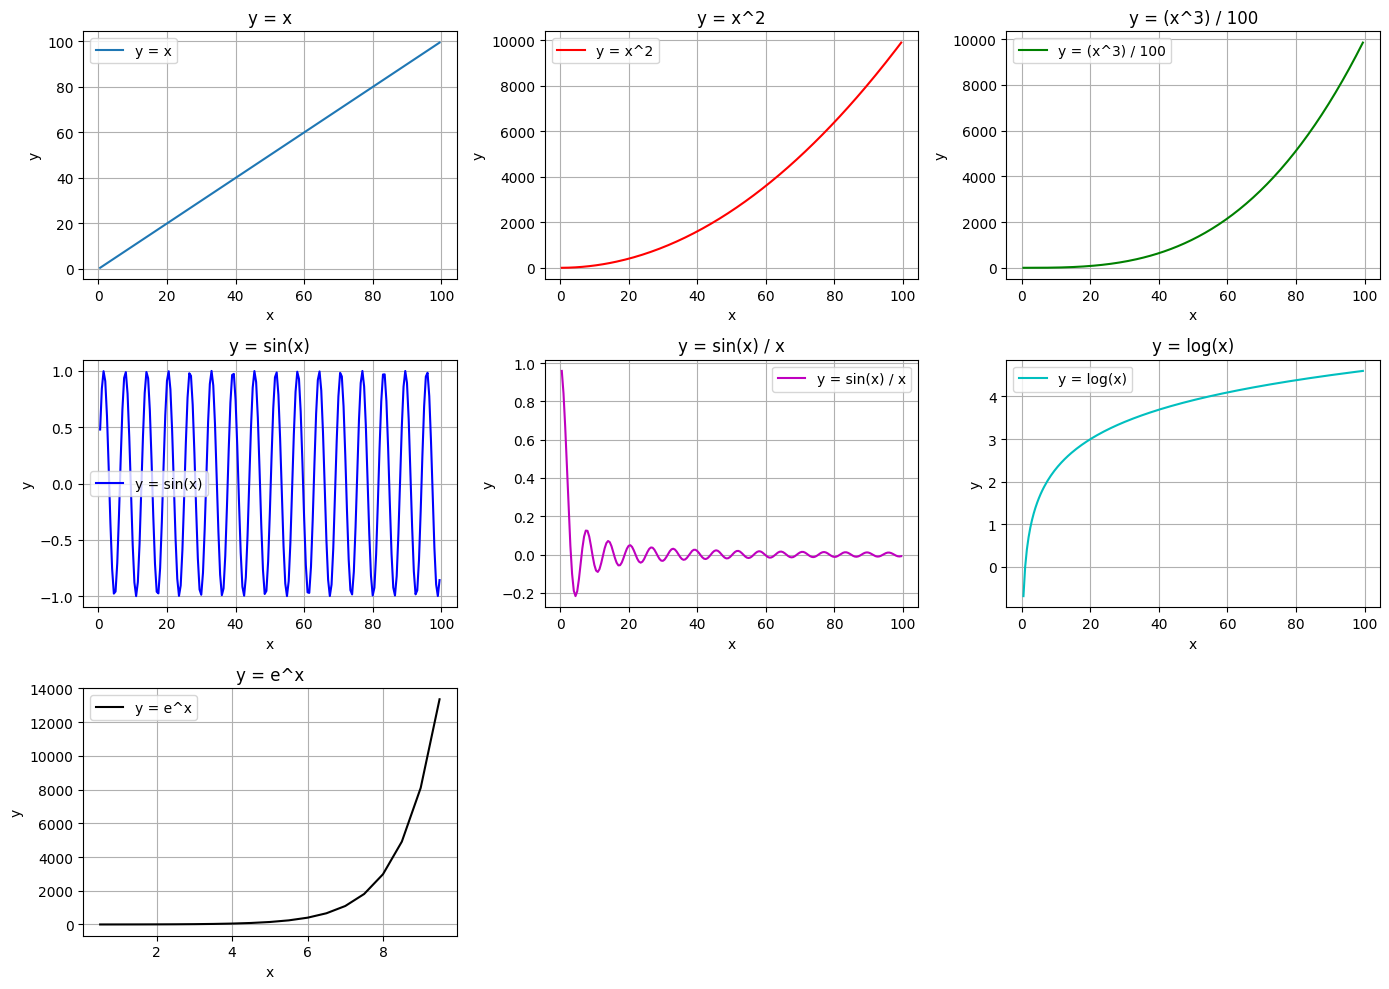

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Domain
x = np.arange(0.5, 100.0, 0.5)

# Functions
y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)

# For e^x, limit the range for better plotting
x_exp = np.arange(0.5, 10.0, 0.5)
y7 = np.exp(x_exp)

plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.plot(x, y1, label='y = x')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(x, y2, label='y = x^2', color='r')
plt.title('y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(x, y3, label='y = (x^3) / 100', color='g')
plt.title('y = (x^3) / 100')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(x, y4, label='y = sin(x)', color='b')
plt.title('y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 5)
plt.plot(x, y5, label='y = sin(x) / x', color='m')
plt.title('y = sin(x) / x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(x, y6, label='y = log(x)', color='c')
plt.title('y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(x_exp, y7, label='y = e^x', color='k')
plt.title('y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



Question 10 

In [48]:
import numpy as np
import pandas as pd

# Step 1: Generate a 20x5 matrix with uniform random numbers between 1 and 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Step 2: Create a DataFrame with column names
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Step 3: Find the column with the highest standard deviation
col_with_max_std = df.std().idxmax()

# Step 4: Find the row with the lowest mean
row_with_min_mean = df.mean(axis=1).idxmin()

# Output results
print("matrix:",matrix)
print("Generated DataFrame:")
print(df, "\n")
print(f"Column with highest standard deviation: {col_with_max_std}")
print(f"Row index with lowest mean: {row_with_min_mean}")


matrix: [[1.14849251 1.29230513 1.64469025 1.43241806 1.82092344]
 [1.17298561 1.84106743 1.56063081 1.43790613 1.61649646]
 [1.4076666  1.11736327 1.27459866 1.1813858  1.79231651]
 [1.80256339 1.48973694 1.77645272 1.56994853 1.96965676]
 [1.42098449 1.54137615 1.75006772 1.51366103 1.58528246]
 [1.65075293 1.18366353 1.06434716 1.90793538 1.60987652]
 [1.29005098 1.9859898  1.63347799 1.9168868  1.74563275]
 [1.99335054 1.72058742 1.71770518 1.94839872 1.42278786]
 [1.45686288 1.73508    1.02391297 1.10036246 1.36135457]
 [1.56691759 1.97367071 1.98519156 1.45569724 1.44006512]
 [1.25074886 1.41063318 1.56366242 1.26282619 1.65922497]
 [1.71116307 1.55097088 1.7348588  1.15029504 1.89868906]
 [1.77287261 1.45765738 1.37809041 1.02401494 1.31468761]
 [1.48257932 1.57415803 1.02094388 1.29275113 1.93434935]
 [1.58958088 1.47218336 1.43474044 1.19324434 1.17353912]
 [1.69616157 1.07453722 1.85078073 1.85209718 1.50363184]
 [1.63483673 1.69089213 1.15817986 1.90850212 1.06229313]
 [1.97

Question 11

In [49]:
import numpy as np
import pandas as pd

# Step 1: Generate the original 20x5 DataFrame
matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Step 2: Add column 'f' = sum of columns a–e
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Step 3: Add column 'g' = 'LT8' if f < 8, else 'GT8'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Step 4: Find number of rows where g == 'LT8'
lt8_count = (df['g'] == 'LT8').sum()

# Step 5: Find std deviation of 'f' for LT8 and GT8 separately
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

# Output
print("DataFrame:\n", df, "\n")
print(f"Number of rows where g == 'LT8': {lt8_count}")
print(f"Std deviation of 'f' for LT8: {std_lt8:.4f}")
print(f"Std deviation of 'f' for GT8: {std_gt8:.4f}")


DataFrame:
            a         b         c         d         e         f    g
0   1.887314  1.346267  1.200073  1.701719  1.906128  8.041501  GT8
1   1.085005  1.846828  1.715815  1.803065  1.357550  7.808263  LT8
2   1.731714  1.919178  1.303104  1.533213  1.471295  7.958504  LT8
3   1.647509  1.495998  1.201574  1.215544  1.460553  7.021178  LT8
4   1.837753  1.846176  1.585585  1.707704  1.899381  8.876600  GT8
5   1.863066  1.763212  1.486744  1.889843  1.904880  8.907745  GT8
6   1.482928  1.993195  1.700083  1.204161  1.230254  7.610622  LT8
7   1.558678  1.362062  1.633586  1.801393  1.297877  7.653596  LT8
8   1.987113  1.070655  1.338083  1.220962  1.824481  7.441294  LT8
9   1.434075  1.485957  1.806054  1.484352  1.733260  7.943697  LT8
10  1.076386  1.819253  1.610495  1.527328  1.089342  7.122806  LT8
11  1.442444  1.697262  1.153544  1.969693  1.469610  7.732554  LT8
12  1.719491  1.846769  1.210846  1.576102  1.571878  7.925087  LT8
13  1.046973  1.120530  1.863887  1.

Question 12 

In [50]:
import numpy as np

# Example 1: Adding a scalar to an array
arr1 = np.array([1, 2, 3])
print("Original array:", arr1)

# Broadcasting: scalar (5) is "stretched" to match the shape of arr1
result1 = arr1 + 5
print("After adding 5:", result1)

# Example 2: Adding a 1D array to a 2D array
arr2 = np.array([[1, 2, 3],
                 [4, 5, 6]])
arr3 = np.array([10, 20, 30])  # Shape (3,)

# Broadcasting: arr3 is repeated across each row of arr2
result2 = arr2 + arr3
print("\n2D array:\n", arr2)
print("1D array:", arr3)
print("After broadcasting addition:\n", result2)


Original array: [1 2 3]
After adding 5: [6 7 8]

2D array:
 [[1 2 3]
 [4 5 6]]
1D array: [10 20 30]
After broadcasting addition:
 [[11 22 33]
 [14 25 36]]


Question 13 

In [51]:
import numpy as np

def my_argmin(arr):
    """
    Find the index of the smallest element in a numpy array.
    """
    min_index = 0                 # Start assuming the first element is the smallest
    min_value = arr[0]            # Store its value

    # Loop through the array starting from index 1
    for i in range(1, len(arr)):
        if arr[i] < min_value:    # If we find a smaller value
            min_value = arr[i]    # Update the smallest value
            min_index = i         # Update the index

    return min_index

# Test the function
arr = np.array([5, 2, 8, -3, 4])
print("My function result:", my_argmin(arr))
print("np.argmin result:", np.argmin(arr))  # For verification


My function result: 3
np.argmin result: 3
